<a href="https://colab.research.google.com/github/kareembadrsaber/electropi.ai_projects/blob/master/Airbnb_Listing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Panda Setting**

In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [236]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [120]:
DATA_PATH = os.path.join(os.getcwd(),'data','/listings (2).csv')
df = pd.read_csv(DATA_PATH)
df.head()

id                                             name    host_id host_name neighbourhood_group     neighbourhood   latitude  longitude        room_type  price  minimum_nights  number_of_reviews last_review  reviews_per_month  calculated_host_listings_count  availability_365  number_of_reviews_ltm license
0  816783428767938211                   Cool studio 3 min from subway!   47125955    Rebeca              Queens  Long Island City  40.761327 -73.926758  Entire home/apt  110.0              30                  9  2023-09-25               0.96                               2               363                      9     NaN
1             8686040                      LARGE MANHATTAN ONE BEDROOM   45608786  Virginia           Manhattan            Inwood  40.859990 -73.928500  Entire home/apt    NaN              30                  5  2015-11-22               0.05                               1                 0                      0     NaN
2            12426778                                        TH BRKLYN    7963317       Rob            Brooklyn       Boerum Hill  40.688340 -73.986010     Private room    NaN              30                  0         NaN                NaN                               1                 0                      0     NaN
3            22671517                                    55 washington    3428456      Yoon            Brooklyn             DUMBO  40.701490 -73.988860     Private room    NaN              30                  0         NaN                NaN                               1                 0                      0     NaN
4            35776956  luxury apt in long lsland city \n1min to subway  221012726       Lyn              Queens  Long Island City  40.749010 -73.938980     Private room    NaN              30                  1  2019-07-31               0.02                               1                 0                      0     NaN

## **Data Shape , Info , Description**

In [121]:
df.shape

(39319, 18)

It look like the data has 39319 rows and 18 columns

In [122]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license'], dtype='object')

In [123]:
len(df.columns)

18

# **Info**

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39319 entries, 0 to 39318
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39319 non-null  int64  
 1   name                            39317 non-null  object 
 2   host_id                         39319 non-null  int64  
 3   host_name                       39313 non-null  object 
 4   neighbourhood_group             39319 non-null  object 
 5   neighbourhood                   39319 non-null  object 
 6   latitude                        39319 non-null  float64
 7   longitude                       39319 non-null  float64
 8   room_type                       39319 non-null  object 
 9   price                           24277 non-null  float64
 10  minimum_nights                  39319 non-null  int64  
 11  number_of_reviews               39319 non-null  int64  
 12  last_review                     

In [125]:
important_featutes = ['id', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
                     'latitude', 'longitude', 'name', 'room_type', 'price', 'number_of_reviews',
                     'reviews_per_month', 'minimum_nights', 'availability_365',
                     'number_of_reviews_ltm', 'calculated_host_listings_count', 'last_review', 'license']

important_features_df= df[important_featutes]

In [126]:
important_features_df.isna().sum()

id                                    0
host_id                               0
host_name                             6
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
name                                  2
room_type                             0
price                             15042
number_of_reviews                     0
reviews_per_month                 11805
minimum_nights                        0
availability_365                      0
number_of_reviews_ltm                 0
calculated_host_listings_count        0
last_review                       11805
license                           34212
dtype: int64

In [127]:
important_features_df.dtypes


id                                  int64
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
name                               object
room_type                          object
price                             float64
number_of_reviews                   int64
reviews_per_month                 float64
minimum_nights                      int64
availability_365                    int64
number_of_reviews_ltm               int64
calculated_host_listings_count      int64
last_review                        object
license                            object
dtype: object

In [128]:
important_features_df.corr(numeric_only=True)

id   host_id  latitude  longitude     price  number_of_reviews  reviews_per_month  minimum_nights  availability_365  number_of_reviews_ltm  calculated_host_listings_count
id                              1.000000  0.476131  0.022199   0.039427  0.018462          -0.226935           0.186960       -0.097120          0.328967               0.012029                        0.179574
host_id                         0.476131  1.000000  0.028158   0.104226  0.009536          -0.088470           0.221212       -0.119772          0.274314               0.088996                       -0.033401
latitude                        0.022199  0.028158  1.000000   0.050672  0.003462          -0.052259          -0.040133       -0.007309          0.005262              -0.040834                        0.034785
longitude                       0.039427  0.104226  0.050672   1.000000 -0.050314           0.045878           0.058058        0.017845          0.082171               0.058108                       -0.085406
price                           0.018462  0.009536  0.003462  -0.050314  1.000000          -0.015908          -0.003243       -0.027819          0.023260              -0.010675                        0.007189
number_of_reviews              -0.226935 -0.088470 -0.052259   0.045878 -0.015908           1.000000           0.659454       -0.066370          0.047694               0.619571                       -0.121703
reviews_per_month               0.186960  0.221212 -0.040133   0.058058 -0.003243           0.659454           1.000000       -0.143038          0.104273               0.856928                       -0.069560
minimum_nights                 -0.097120 -0.119772 -0.007309   0.017845 -0.027819          -0.066370          -0.143038        1.000000         -0.023626              -0.104624                        0.036508
availability_365                0.328967  0.274314  0.005262   0.082171  0.023260           0.047694           0.104273       -0.023626          1.000000               0.062581                        0.094680
number_of_reviews_ltm           0.012029  0.088996 -0.040834   0.058108 -0.010675           0.619571           0.856928       -0.104624          0.062581               1.000000                       -0.089711
calculated_host_listings_count  0.179574 -0.033401  0.034785  -0.085406  0.007189          -0.121703          -0.069560        0.036508          0.094680              -0.089711                        1.000000

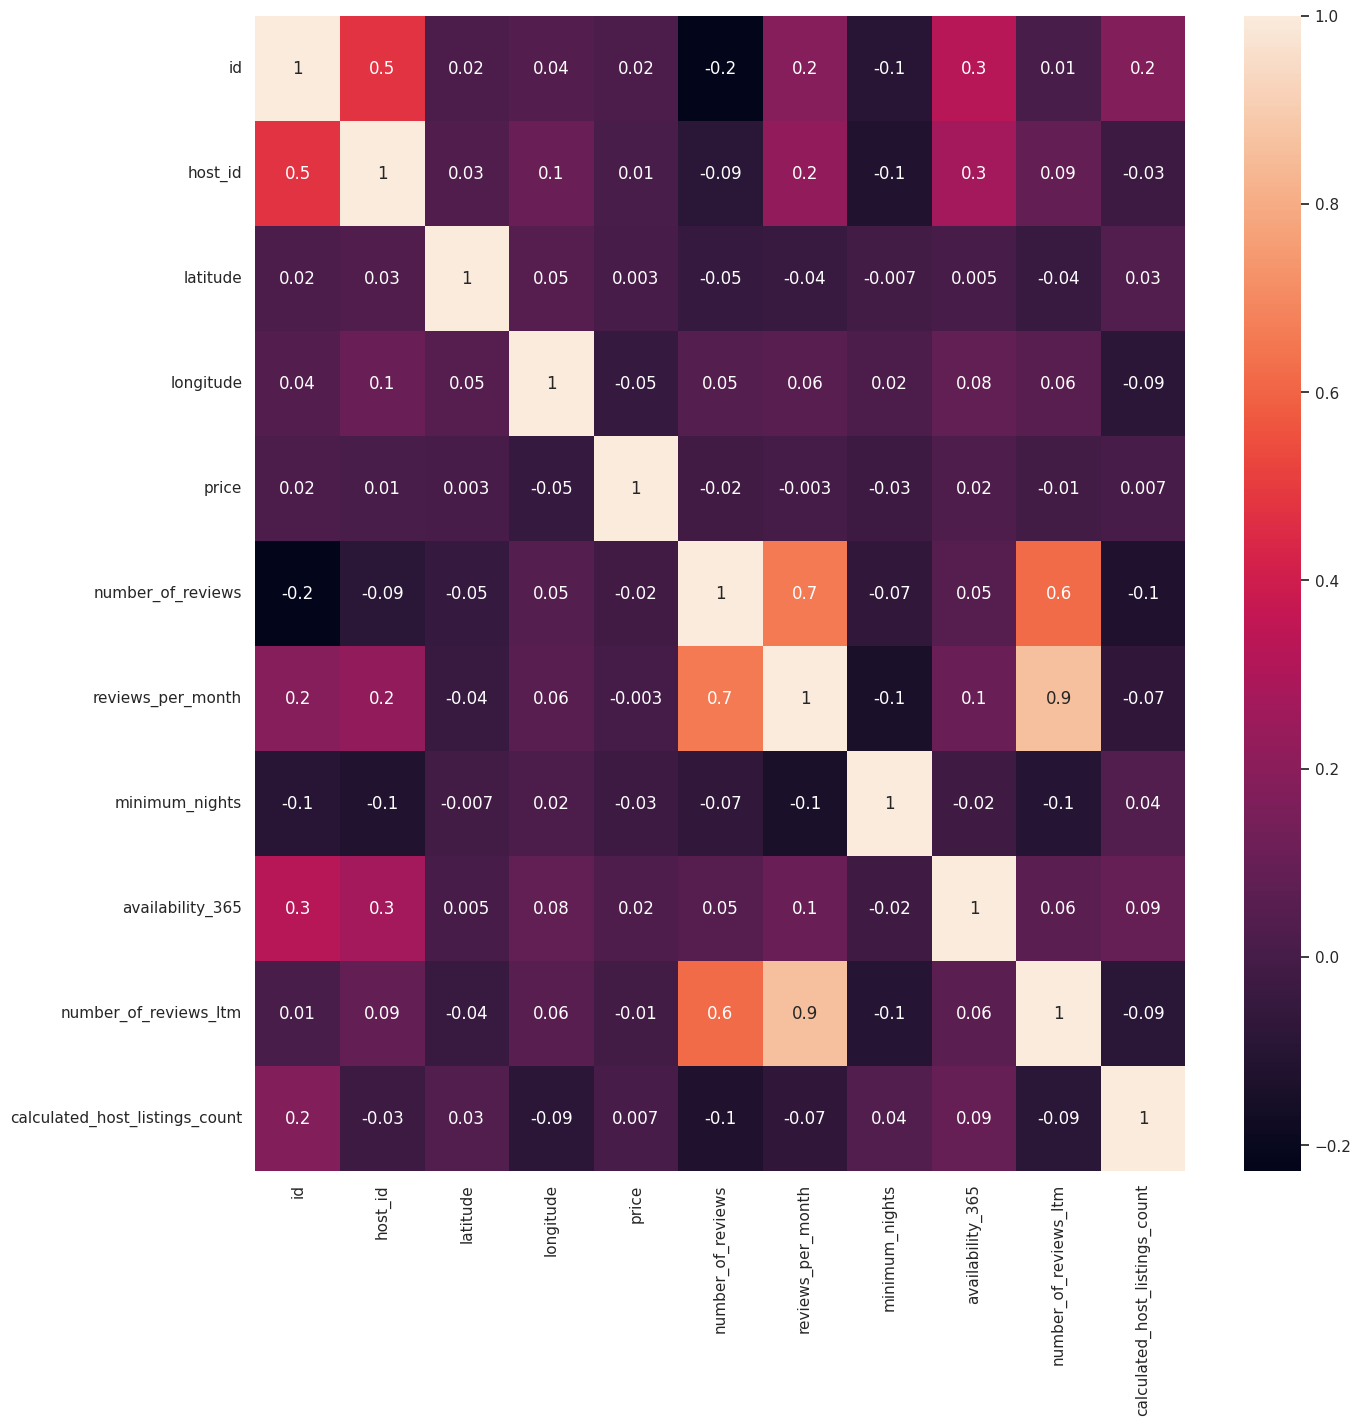

In [129]:
plt.figure(figsize=(15,15))
sns.heatmap(important_features_df.corr(numeric_only=True),annot=True,fmt='.1g')
plt.show()

# **Describe Data**


In [130]:
important_features_df.describe()

id       host_id      latitude     longitude          price  number_of_reviews  reviews_per_month  minimum_nights  availability_365  number_of_reviews_ltm  calculated_host_listings_count
count  3.931900e+04  3.931900e+04  39319.000000  39319.000000   24277.000000       39319.000000       27514.000000    39319.000000      39319.000000           39319.000000                    39319.000000
mean   3.354009e+17  1.628209e+08     40.729172    -73.946640     205.272892          24.918106           0.927277       29.367125        146.682418               5.365447                       48.610468
std    4.272047e+17  1.757040e+08      0.056337      0.054622     993.318776          58.654299           1.683886       28.814873        144.589719              16.561050                      151.570957
min    2.595000e+03  1.678000e+03     40.500314    -74.251907       8.000000           0.000000           0.010000        1.000000          0.000000               0.000000                        1.000000
25%    2.042637e+07  1.692691e+07     40.688880    -73.983120      80.000000           0.000000           0.100000       30.000000          0.000000               0.000000                        1.000000
50%    4.731606e+07  8.081323e+07     40.726368    -73.954370     130.000000           4.000000           0.340000       30.000000         95.000000               0.000000                        1.000000
75%    7.920235e+17  2.934481e+08     40.762650    -73.927380     217.000000          21.000000           1.240000       30.000000        288.000000               4.000000                        7.000000
max    1.106684e+18  5.657054e+08     40.911380    -73.713650  100000.000000        1897.000000          86.030000     1250.000000        365.000000            1034.000000                      842.000000

In [131]:
important_features_df.head(1)

id   host_id host_name neighbourhood_group     neighbourhood   latitude  longitude                            name        room_type  price  number_of_reviews  reviews_per_month  minimum_nights  availability_365  number_of_reviews_ltm  calculated_host_listings_count last_review license
0  816783428767938211  47125955    Rebeca              Queens  Long Island City  40.761327 -73.926758  Cool studio 3 min from subway!  Entire home/apt  110.0                  9               0.96              30               363                      9                               2  2023-09-25     NaN

In [132]:
percentage_of_data_having_availbility_0 = round(len(important_features_df[important_features_df['availability_365'] == 0])/len(important_features_df['availability_365'])*100,2)

In [133]:
print(f'Percentage of hosts have Zeror avaialbility per year id {percentage_of_data_having_availbility_0} %')

Percentage of hosts have Zeror avaialbility per year id 36.49 %


In [134]:
important_features_df[important_features_df['availability_365'] == 0].groupby(['last_review']).size().sort_values(ascending=False).head(20)

last_review
2020-01-01    118
2020-01-02     79
2019-01-01     64
2018-01-01     64
2023-09-04     43
2016-01-05     39
2020-01-03     38
2016-01-03     35
2017-01-01     35
2019-01-02     35
2020-03-15     34
2017-01-02     33
2016-01-02     33
2023-01-01     32
2020-02-16     32
2024-02-19     31
2018-01-02     30
2020-03-08     29
2019-12-29     28
2016-01-01     28
dtype: int64

In [135]:
cleaned_df['host_name'].value_counts().sort_values(ascending=False).iloc[:10]

host_name
Blueground         842
Eugene             635
RoomPicks          377
Michael            360
June               329
Kristina           309
Urban Furnished    300
David              290
Reservations       279
Hiroki             273
Name: count, dtype: int64

In [136]:
custom_palette = sns.color_palette("deep")

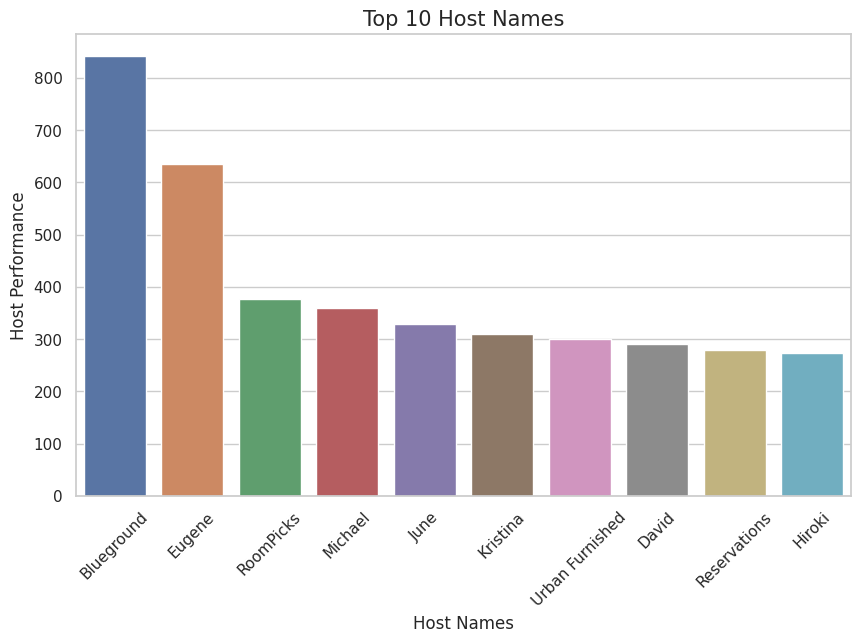

In [137]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_host_counts.index, y=top_host_counts, palette=custom_palette)
plt.title('Top 10 Host Names', fontsize=15)
plt.xlabel('Host Names')
plt.ylabel('Host Performance')
plt.xticks(rotation=45)
plt.show()


## **Observation**
**Host name is the name of the host who listed the hotel in the airbnb.**
**It looks like the Blueground has the largest booking under his name with 842 bookings**
**Eugene is the host name with 635 bookings**

In [139]:
df['host_id'].value_counts().reset_index().iloc[:10]

host_id  count
0  107434423    842
1    3223938    628
2  305240193    320
3  496932087    279
4   19303369    273
5  200239515    254
6  162280872    250
7  204704622    235
8  496944100    180
9  501499086    166

In [140]:
top_host_ids = df['host_id'].value_counts().reset_index().iloc[:10]
custom_palette = sns.color_palette("deep")

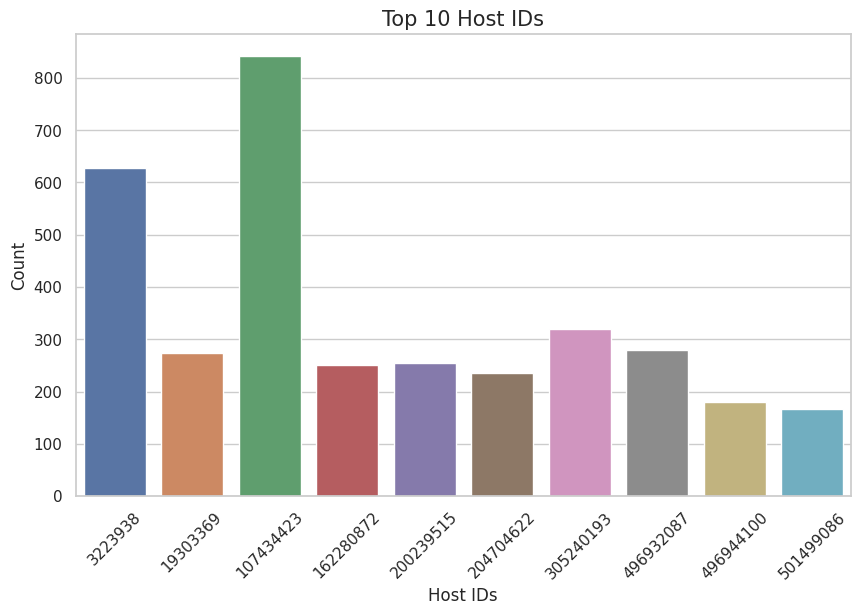

In [141]:
plt.figure(figsize=(10, 6))
sns.barplot(x='host_id', y='count', data=top_host_ids, palette=custom_palette)
plt.title('Top 10 Host IDs', fontsize=15)
plt.xlabel('Host IDs')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## **Observation**
**1-We can see that there is a good distribution between top 10 hosts with the most listings.**

**2-third host has more than 700+ listings.**


In [142]:
cleaned_df['price'] = pd.to_numeric(cleaned_df['price'].fillna('').astype(str).apply(lambda price: price[1:].replace(',', '')), errors='coerce')

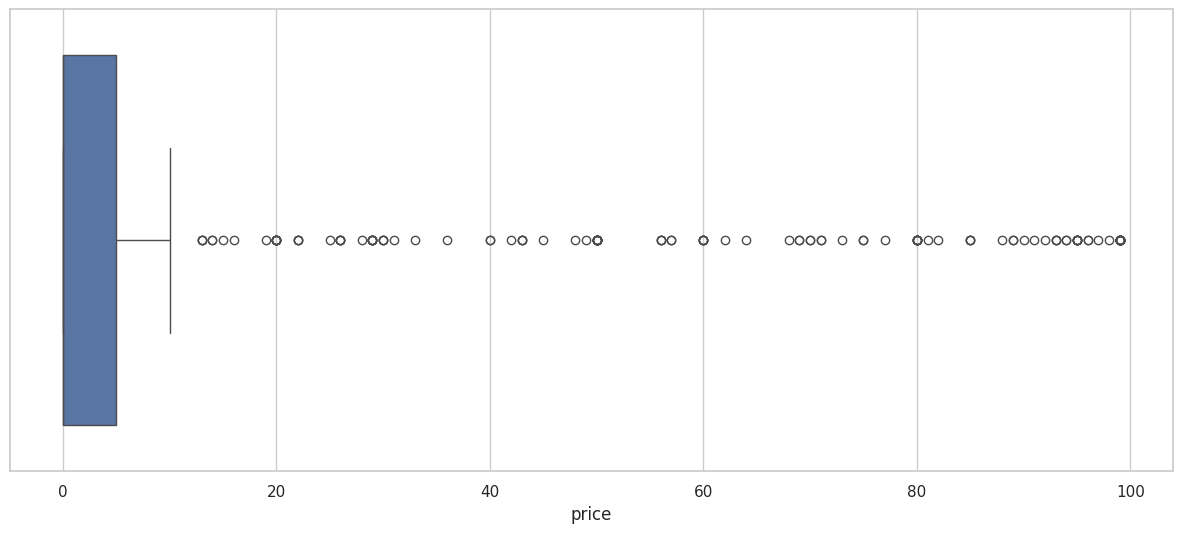

In [143]:
plt.figure(figsize=(15,6))
sns.boxplot(x = cleaned_df['price'])
plt.show()

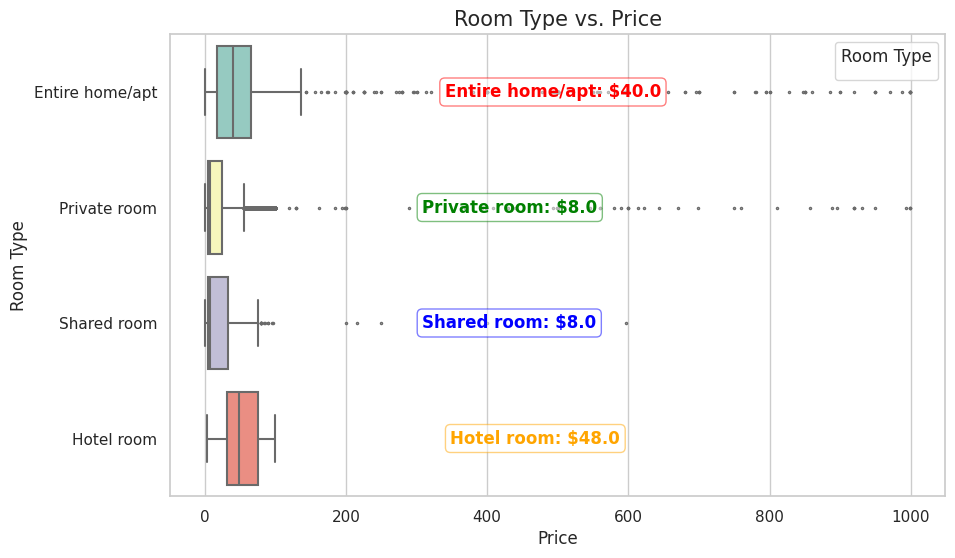

In [144]:
plt.figure(figsize=(10, 6))
sns.set_theme(style='whitegrid')
sns.boxplot(y='room_type', x='price', hue='room_type', palette='Set3', linewidth=1.5, fliersize=1.5, data=df_price)


annotation_colors = ['red', 'green', 'blue', 'orange', 'purple']  # Add more colors if needed
colors = sns.color_palette('Set3', len(df_price['room_type'].unique()))
for i, room_type in enumerate(df_price['room_type'].unique()):
    median_price = df_price[df_price['room_type'] == room_type]['price'].median()
    color_index = i % len(annotation_colors)  # Cycle through annotation_colors
    plt.text(median_price + 300, i, f'{room_type}: ${median_price}', ha='left', va='center', fontsize=12, color=annotation_colors[color_index], weight='bold', bbox=dict(facecolor='white', alpha=0.5, edgecolor=annotation_colors[color_index], boxstyle='round,pad=0.3'))

plt.title('Room Type vs. Price', fontsize=15)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Room Type', fontsize=12)
plt.legend(title='Room Type')
plt.show()



**To investigate the numerous outliers in price within each** **room type category, let's delve into the reasons** **behind the exceptionally high prices. This exploration will** **shed light on what factors contribute to hosts** **commanding such high prices for their rooms.**

In [145]:
cleaned_df['price'].describe()

count    24277.000000
mean         2.320715
std          6.006817
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max         99.000000
Name: price, dtype: float64

<ipython-input-146-c533185d4107>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




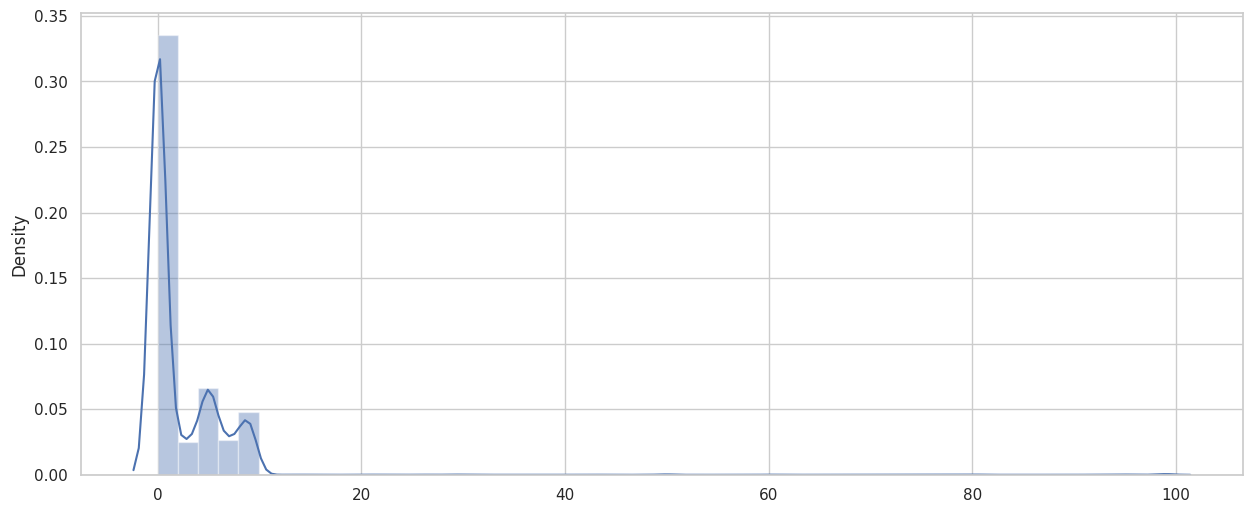

In [146]:
plt.figure(figsize=(15,6))
sns.distplot(x = cleaned_df['price'])
plt.show()

In [165]:
Q1 = cleaned_df['price'].quantile(0.25)
Q3 = cleaned_df['price'].quantile(0.75)
Q2 = cleaned_df['price'].median()
IQR = Q3 - Q1

In [166]:
print('The IQR is',IQR)
print('The Minimum value is', (Q3 - (1.5* (IQR))))
print('The maximum value is', (Q3 + (1.5* (IQR))))

The IQR is 5.0
The Minimum value is -2.5
The maximum value is 12.5


In [167]:
df_new = cleaned_df[cleaned_df['price'] < 12.5 ]


In [168]:
cleaned_df.groupby(['neighbourhood'])['price'].describe().T.reset_index()

neighbourhood  index   Allerton  Arden Heights  Arrochar    Arverne     Astoria  Bath Beach  Battery Park City  Bay Ridge  Bay Terrace  Bay Terrace, Staten Island  Baychester    Bayside  Bayswater  Bedford-Stuyvesant  Belle Harbor  Bellerose    Belmont  Bensonhurst  Bergen Beach  Boerum Hill  Borough Park  Breezy Point  Briarwood  Brighton Beach  Bronxdale  Brooklyn Heights  Brownsville  Bull's Head    Bushwick  Cambria Heights    Canarsie  Carroll Gardens  Castle Hill  Castleton Corners     Chelsea  Chelsea, Staten Island   Chinatown  City Island  Civic Center  Claremont Village  Clason Point    Clifton  Clinton Hill  Co-op City  Cobble Hill  College Point  Columbia St   Concord  Concourse  Concourse Village  Coney Island     Corona  Country Club  Crown Heights  Cypress Hills      DUMBO  Ditmars Steinway  Dongan Hills  Douglaston  Downtown Brooklyn  Dyker Heights  East Elmhurst  East Flatbush  East Harlem  East Morrisania  East New York  East Village  Eastchester   Edenwald  \
0              count  41.000000       5.000000  9.000000  57.000000  361.000000   23.000000          31.000000  98.000000         4.00                         1.0   26.000000  44.000000        9.0         1762.000000      6.000000  13.000000  30.000000    35.000000     15.000000    54.000000     42.000000           4.0  36.000000       46.000000  12.000000         40.000000    94.000000     6.000000  916.000000        37.000000  199.000000        91.000000     7.000000           5.000000  469.000000                     1.0  181.000000    10.000000     10.000000          43.000000     39.000000  10.000000    168.000000    6.000000    33.000000      36.000000     9.000000  6.000000  34.000000          23.000000     14.000000  48.000000           1.0     766.000000     163.000000  18.000000        133.000000      5.000000         4.0          36.000000      13.000000     183.000000     459.000000   442.000000         7.000000     260.000000    484.000000     6.000000  17.000000   
1               mean   1.414634       3.400000  2.000000   2.105263    1.279778    1.565217           2.354839   1.316327         2.25                         0.0    0.423077   2.068182        0.0            1.538025      1.166667   2.384615   0.033333     1.714286      2.133333     2.777778      0.357143           0.0   1.805556        1.695652   1.000000          1.850000     1.414894     1.333333    1.274017         0.864865    1.753769         2.868132     0.428571           3.800000    4.010661                     0.0    3.270718     1.900000      3.500000           0.674419      1.435897   2.500000      2.541667    0.666667     2.060606       1.611111     2.000000  0.500000   0.970588           1.652174      1.071429   1.083333           8.0       2.036554       1.085890   2.055556          1.458647      2.200000         0.0           2.416667       1.153846       1.442623       1.420479     2.038462         1.285714       1.584615      2.950413     1.666667   0.882353   
2                std   2.408066       3.209361  3.968627   4.450860    2.480335    2.760535           3.189027   2.614775         4.50                         NaN    1.792720   2.936520        0.0            2.934642      2.041241   3.571612   0.182574     2.706978      3.136574     3.379554      1.226167           0.0   4.152930        3.210189   2.662876          2.587445     2.752944     3.265986    4.552093         2.043447    2.866503         6.820246     1.133893           3.834058    9.457388                     NaN    8.199504     3.107339      4.527693           2.200876      2.403888   3.407508      3.146815    1.632993     2.978458       3.416580     3.278719  1.224745   2.443114           3.199555      2.129077   2.508143           NaN       5.341780       2.342308   2.940032          2.794777      2.280351         0.0           2.644401       2.823891       2.843102       2.787154     3.889152         2.360387       2.786577      7.919210     2.658320   2.232777   
3                min   0.000

In [169]:
df_new.groupby(['neighbourhood'])['price'].describe().T.reset_index()

neighbourhood  index   Allerton  Arden Heights  Arrochar    Arverne     Astoria  Bath Beach  Battery Park City  Bay Ridge  Bay Terrace  Bay Terrace, Staten Island  Baychester    Bayside  Bayswater  Bedford-Stuyvesant  Belle Harbor  Bellerose    Belmont  Bensonhurst  Bergen Beach  Boerum Hill  Borough Park  Breezy Point  Briarwood  Brighton Beach  Bronxdale  Brooklyn Heights  Brownsville  Bull's Head    Bushwick  Cambria Heights    Canarsie  Carroll Gardens  Castle Hill  Castleton Corners     Chelsea  Chelsea, Staten Island   Chinatown  City Island  Civic Center  Claremont Village  Clason Point    Clifton  Clinton Hill  Co-op City  Cobble Hill  College Point  Columbia St   Concord  Concourse  Concourse Village  Coney Island     Corona  Country Club  Crown Heights  Cypress Hills      DUMBO  Ditmars Steinway  Dongan Hills  Douglaston  Downtown Brooklyn  Dyker Heights  East Elmhurst  East Flatbush  East Harlem  East Morrisania  East New York  East Village  Eastchester   Edenwald  \
0              count  41.000000       5.000000  9.000000  56.000000  361.000000   23.000000          31.000000  98.000000         4.00                         1.0   26.000000  44.000000        9.0         1761.000000      6.000000  13.000000  30.000000    35.000000     15.000000    54.000000     42.000000           4.0  35.000000       46.000000  12.000000         40.000000    94.000000     6.000000  913.000000        37.000000  199.000000        90.000000     7.000000           5.000000  462.000000                     1.0  177.000000    10.000000     10.000000          43.000000     39.000000  10.000000    168.000000    6.000000    33.000000      36.000000     9.000000  6.000000  34.000000          23.000000     14.000000  48.000000           1.0     764.000000     163.000000  18.000000        133.000000      5.000000         4.0          36.000000      13.000000     183.000000     459.000000   441.000000         7.000000     260.000000    479.000000     6.000000  17.000000   
1               mean   1.414634       3.400000  2.000000   1.625000    1.279778    1.565217           2.354839   1.316327         2.25                         0.0    0.423077   2.068182        0.0            1.510505      1.166667   2.384615   0.033333     1.714286      2.133333     2.777778      0.357143           0.0   1.285714        1.695652   1.000000          1.850000     1.414894     1.333333    1.067908         0.864865    1.753769         2.233333     0.428571           3.800000    2.961039                     0.0    2.163842     1.900000      3.500000           0.674419      1.435897   2.500000      2.541667    0.666667     2.060606       1.611111     2.000000  0.500000   0.970588           1.652174      1.071429   1.083333           8.0       1.811518       1.085890   2.055556          1.458647      2.200000         0.0           2.416667       1.153846       1.442623       1.420479     1.913832         1.285714       1.584615      2.279749     1.666667   0.882353   
2                std   2.408066       3.209361  3.968627   2.604629    2.480335    2.760535           3.189027   2.614775         4.50                         NaN    1.792720   2.936520        0.0            2.698490      2.041241   3.571612   0.182574     2.706978      3.136574     3.379554      1.226167           0.0   2.781995        3.210189   2.662876          2.587445     2.752944     3.265986    2.400610         2.043447    2.866503         3.155341     1.133893           3.834058    3.344727                     NaN    3.240588     3.107339      4.527693           2.200876      2.403888   3.407508      3.146815    1.632993     2.978458       3.416580     3.278719  1.224745   2.443114           3.199555      2.129077   2.508143           NaN       3.015656       2.342308   2.940032          2.794777      2.280351         0.0           2.644401       2.823891       2.843102       2.787154     2.877312         2.360387       2.786577      3.052715     2.658320   2.232777   
3                min   0.000

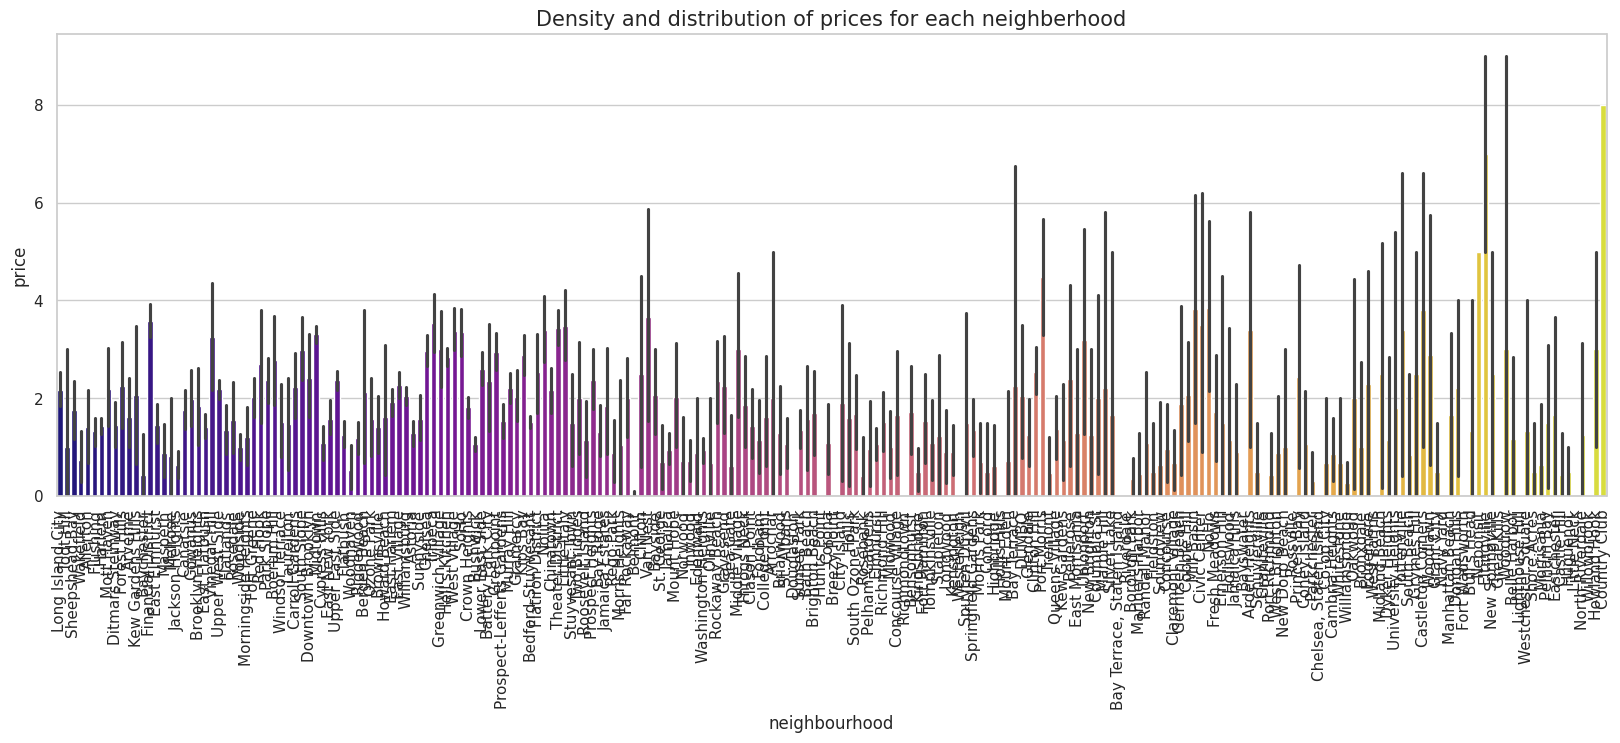

In [170]:
plt.figure(figsize = (20,6))
sns.barplot(df_new, x='neighbourhood',y='price',palette ='plasma')
plt.title('Density and distribution of prices for each neighberhood', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

In [147]:
cleaned_df['room_type'].value_counts()

room_type
Entire home/apt    20735
Private room       17761
Shared room          555
Hotel room           268
Name: count, dtype: int64

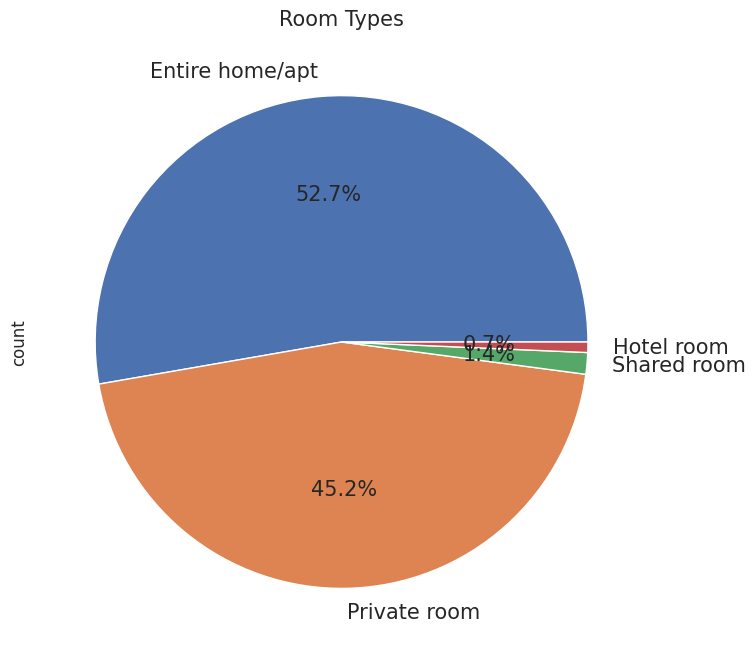

In [148]:
plt.figure(figsize=(8,5))
cleaned_df['room_type'].value_counts().plot(kind = 'pie', figsize = (8,8), fontsize = 15, autopct = '%1.1f%%')
plt.title("Room Types", fontsize = 15)
plt.show()

In [149]:
cleaned_df.groupby(['room_type'])['price'].mean().reset_index()

room_type     price
0  Entire home/apt  3.138354
1       Hotel room  3.865031
2     Private room  1.307736
3      Shared room  1.349296

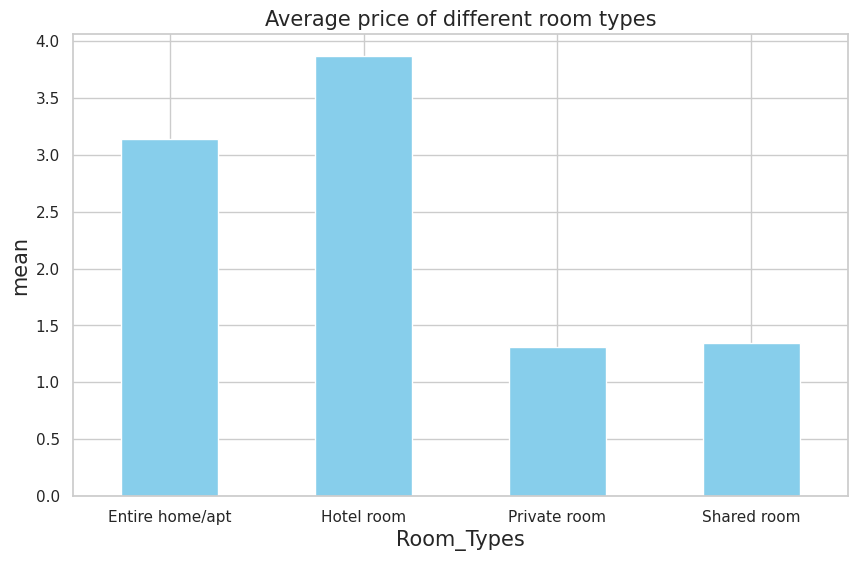

In [150]:
cleaned_df.groupby(['room_type'])['price'].mean().plot(kind='bar', figsize = (10,6), color = 'skyblue')
plt.xticks( rotation = 360)
plt.title("Average price of different room types", fontsize = 15)
plt.xlabel('Room_Types', fontsize = 15)
plt.ylabel('mean', fontsize = 15)
plt.show()

In [151]:
cleaned_df.groupby(['room_type'])['price'].describe()

count      mean       std  min  25%  50%  75%   max
room_type                                                             
Entire home/apt  13198.0  3.138354  6.283165  0.0  0.0  1.0  5.0  99.0
Hotel room         163.0  3.865031  3.310133  0.0  0.0  4.0  7.0   9.0
Private room     10561.0  1.307736  5.499241  0.0  0.0  0.0  0.0  99.0
Shared room        355.0  1.349296  6.156776  0.0  0.0  0.0  0.0  96.0

from matplotlib import pyplot as plt
_df_16['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['50%'].plot(kind='hist', bins=20, title='50%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='std', y='50%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='50%', y='75%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['min']
  ys = series['count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('min', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('min')
_ = plt.ylabel('count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['min']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('min', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('min')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['min']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('min', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('min')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['min']
  ys = series['50%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('min', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('min')
_ = plt.ylabel('50%')

from matplotlib import pyplot as plt
_df_28['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['50%'].plot(kind='line', figsize=(8, 4), title='50%')
plt.gca().spines[['top', 'right']].set_visible(False)

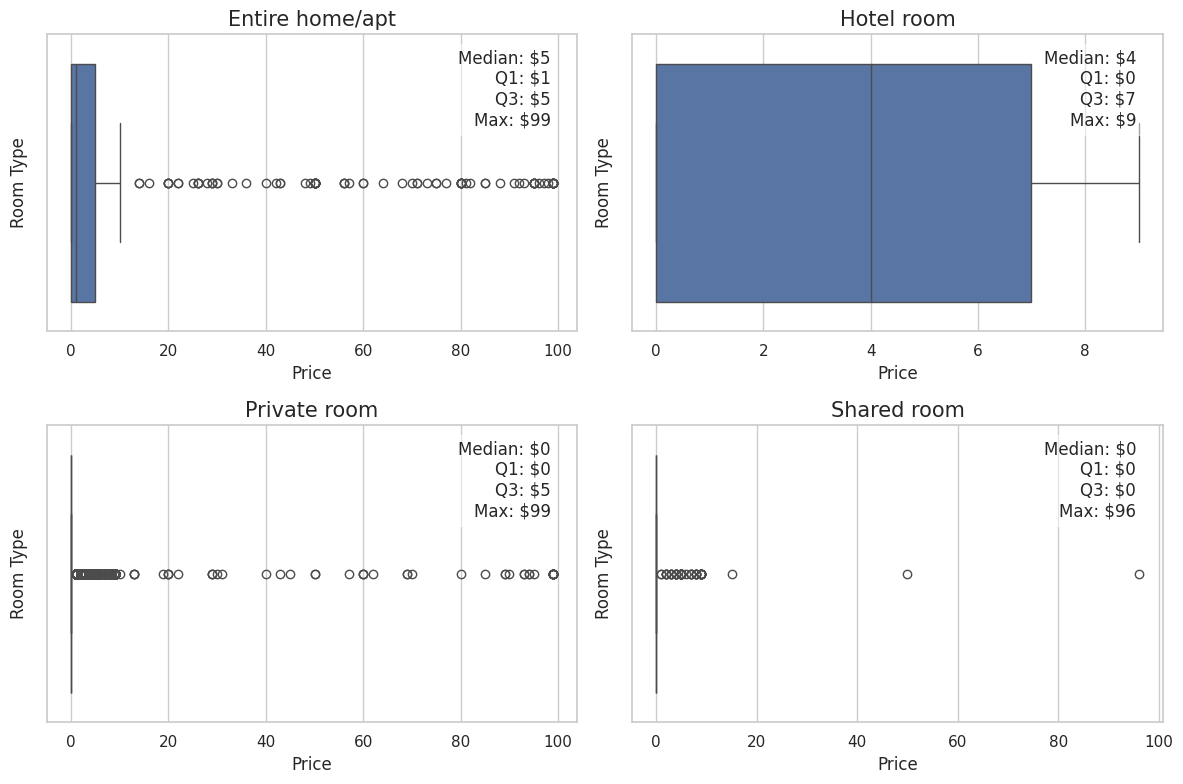

In [158]:
plt.figure(figsize=(12, 8))

# Plot for Entire home/apt
plt.subplot(2, 2, 1)
sns.boxplot(x='price', data=cleaned_df[cleaned_df['room_type'] == 'Entire home/apt'])
plt.title("Entire home/apt", fontsize=15)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Room Type", fontsize=12)

# Add box with text
plt.text(0.95, 0.95, "Median: $5\nQ1: $1\nQ3: $5\nMax: $99", ha='right', va='top', transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.5))

# Plot for Hotel room
plt.subplot(2, 2, 2)
sns.boxplot(x='price', data=cleaned_df[cleaned_df['room_type'] == 'Hotel room'])
plt.title("Hotel room", fontsize=15)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Room Type", fontsize=12)

# Add box with text
plt.text(0.95, 0.95, "Median: $4\nQ1: $0\nQ3: $7\nMax: $9", ha='right', va='top', transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.5))

# Plot for Private room
plt.subplot(2, 2, 3)
sns.boxplot(x='price', data=cleaned_df[cleaned_df['room_type'] == 'Private room'])
plt.title("Private room", fontsize=15)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Room Type", fontsize=12)

# Add box with text
plt.text(0.95, 0.95, "Median: $0\nQ1: $0\nQ3: $5\nMax: $99", ha='right', va='top', transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.5))

# Plot for Shared room
plt.subplot(2, 2, 4)
sns.boxplot(x='price', data=cleaned_df[cleaned_df['room_type'] == 'Shared room'])
plt.title("Shared room", fontsize=15)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Room Type", fontsize=12)

# Add box with text
plt.text(0.95, 0.95, "Median: $0\nQ1: $0\nQ3: $0\nMax: $96", ha='right', va='top', transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

In [190]:
# Merge 'host_areas' DataFrame with 'cleaned_df' to get host names
host_counts_with_names = host_areas.merge(cleaned_df[['host_id', 'host_name']], left_on='host_name', right_on='host_name')

# Sort the DataFrame by calculated_host_listings_count in descending order
sorted_host_counts = host_counts_with_names.sort_values(by='calculated_host_listings_count', ascending=False)

# Drop duplicate entries based on host name, keeping only the first occurrence (which will be the one with the maximum count)
unique_host_counts_with_names = sorted_host_counts.drop_duplicates(subset=['host_name'])

# Display the top host names with their maximum listing count
print(unique_host_counts_with_names.head(5))





           host_name        neighbourhood  calculated_host_listings_count    host_id
78615     Blueground           Greenpoint                             842  107434423
191164        Eugene          East Harlem                             628   19630705
297769          June  Morningside Heights                             320  305240193
455014  Reservations              Tribeca                             279  496932087
222796        Hiroki      Lower East Side                             273   19303369


## **Observation**

**We find that Host name Blueground has listed highest number** **of listings in Greenpoint followed by Blueground**









In [193]:
room_price_area_wise = cleaned_df.groupby(['neighbourhood', 'room_type'])['price'].max().reset_index()
room_price_area_wise_sorted = room_price_area_wise.sort_values(by='price', ascending=False).head(10)
print(room_price_area_wise_sorted)

          neighbourhood        room_type  price
310     Lower East Side  Entire home/apt   99.0
486    Theater District  Entire home/apt   99.0
501             Tribeca  Entire home/apt   99.0
160        East Village  Entire home/apt   99.0
431    Roosevelt Island     Private room   99.0
509     Upper East Side  Entire home/apt   99.0
80              Chelsea  Entire home/apt   99.0
181  Financial District  Entire home/apt   99.0
514     Upper West Side     Private room   99.0
65             Bushwick  Entire home/apt   99.0


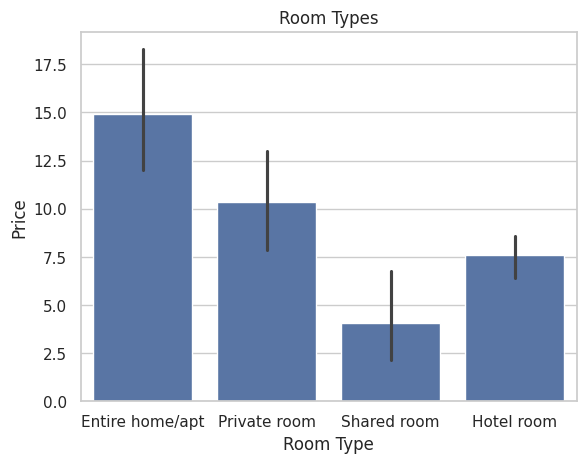

In [194]:

sns.barplot(data=room_price_area_wise,x = 'room_type',y='price')
plt.title('Room Types')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

In [202]:
sample_ptype_listing_counts = cleaned_df.groupby(['neighbourhood', 'room_type'])['calculated_host_listings_count'].max().sort_values(ascending=False).reset_index().head(10)
print(sample_ptype_listing_counts)

        neighbourhood        room_type  calculated_host_listings_count
0         Boerum Hill  Entire home/apt                             842
1          Greenpoint  Entire home/apt                             842
2  Financial District  Entire home/apt                             842
3        Vinegar Hill  Entire home/apt                             842
4        Clinton Hill  Entire home/apt                             842
5     Upper West Side  Entire home/apt                             842
6      Hell's Kitchen  Entire home/apt                             842
7    Brooklyn Heights  Entire home/apt                             842
8         Cobble Hill  Entire home/apt                             842
9             Tribeca  Entire home/apt                             842


In [203]:
sample_ptype_listing_counts = cleaned_df.groupby(['neighbourhood', 'room_type'])['calculated_host_listings_count'].max().sort_values(ascending=False).reset_index().head(10)
print(sample_ptype_listing_counts)


        neighbourhood        room_type  calculated_host_listings_count
0         Boerum Hill  Entire home/apt                             842
1          Greenpoint  Entire home/apt                             842
2  Financial District  Entire home/apt                             842
3        Vinegar Hill  Entire home/apt                             842
4        Clinton Hill  Entire home/apt                             842
5     Upper West Side  Entire home/apt                             842
6      Hell's Kitchen  Entire home/apt                             842
7    Brooklyn Heights  Entire home/apt                             842
8         Cobble Hill  Entire home/apt                             842
9             Tribeca  Entire home/apt                             842


In [205]:
sample_ptype_listing_counts.columns

Index(['neighbourhood', 'room_type', 'calculated_host_listings_count'], dtype='object')

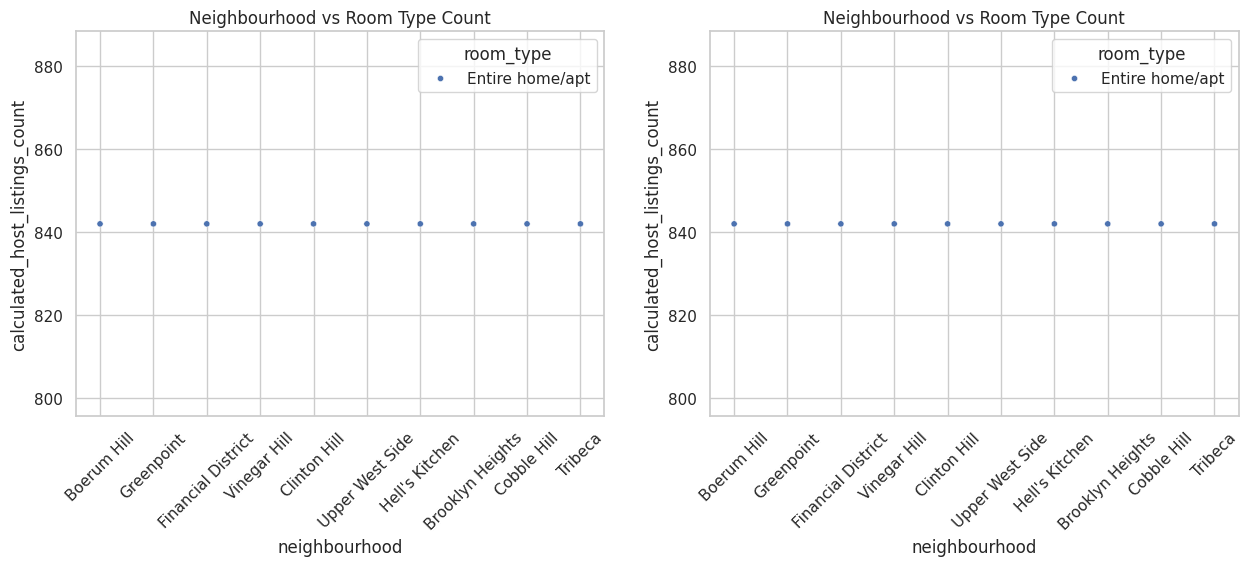

In [206]:
plt.figure(figsize=(15,5))
axes1 = plt.subplot(1, 2, 1)
sns.scatterplot(data=sample_ptype_listing_counts, x='neighbourhood', y='calculated_host_listings_count', hue='room_type', size='room_type', ax=axes1, sizes=(20, 200), legend="full", palette="deep")
plt.title('Neighbourhood vs Room Type Count')
plt.xticks(rotation=45)

axes2 = plt.subplot(1, 2, 2)
sns.scatterplot(data=sample_ptype_listing_counts, x='neighbourhood', y='calculated_host_listings_count', hue='room_type', size='room_type', ax=axes2, sizes=(20, 200), legend="full", palette="deep")
plt.title('Neighbourhood vs Room Type Count')
plt.xticks(rotation=45)
plt.show()


In [207]:
neighbourhood_reviews = cleaned_df.groupby(['neighbourhood'])['number_of_reviews'].max().sort_values(ascending=False).reset_index()
neighbourhood_reviews.head()

area_reviews = cleaned_df.groupby(['neighbourhood'])['number_of_reviews'].max().sort_values(ascending=False).reset_index()
#area_reviews.head()

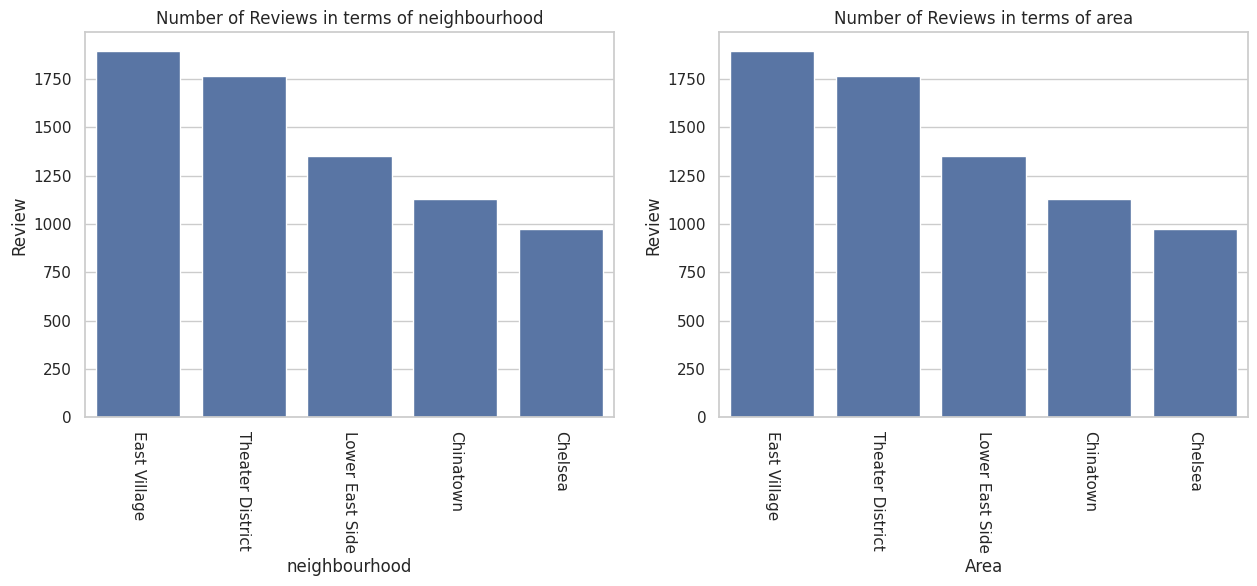

In [208]:
plt.figure(figsize=(15,5))
axes1 = plt.subplot(1, 2, 1)
sns.barplot(data=neighbourhood_reviews.head(),x ='neighbourhood',y='number_of_reviews',ax=axes1)
plt.xlabel('neighbourhood')
plt.ylabel('Review')
plt.title("Number of Reviews in terms of neighbourhood")
plt.xticks(rotation=270)

axes2 = plt.subplot(1, 2, 2)
sns.barplot(data=area_reviews.head(),x ='neighbourhood',y='number_of_reviews',ax=axes2)
plt.xlabel('Area')
plt.ylabel('Review')
plt.title("Number of Reviews in terms of area")
plt.xticks(rotation=270)

plt.show()

In [209]:
price_area = cleaned_df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(10)

price  number_of_reviews
0    0.0               1354
1    1.0               1208
2    2.0                947
3    3.0               1897
4    4.0               1004
5    5.0                547
6    6.0                493
7    7.0               1765
8    8.0                624
9    9.0                740

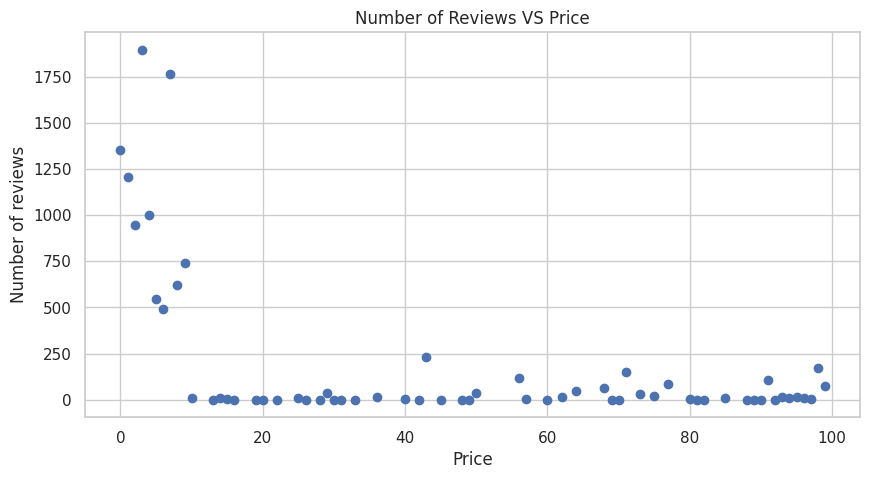

In [210]:
price_list = price_area['price']
review = price_area['number_of_reviews']
fig =plt.figure(figsize =(10,5))

plt.scatter(price_list, review)
plt.xlabel('Price')
plt.ylabel('Number of reviews')
plt.title('Number of Reviews VS Price')
plt.show()

In [211]:
busy_hosts = cleaned_df.groupby(['host_id','host_name','room_type'])['number_of_reviews'].max().reset_index()
busy_hosts = busy_hosts.sort_values(by = 'number_of_reviews', ascending =False).head(10)
busy_hosts

host_id            host_name        room_type  number_of_reviews
19786  266755066            The Ridge     Private room               1897
21853  397872858                    M     Private room               1765
17458  158969505             Untitled  Entire home/apt               1354
22144  417166424  Millennium Broadway     Private room               1208
23206  470859718              SoHoBlu  Entire home/apt               1130
24003  503712643               Alfred     Private room                975
7546    16677326       Alex And Zeena     Private room                923
17628  164291123             Freehand       Hotel room                866
19777  266533448    Chelsea Inn Hotel     Private room                740
3894     5074654                 Seth     Private room                707

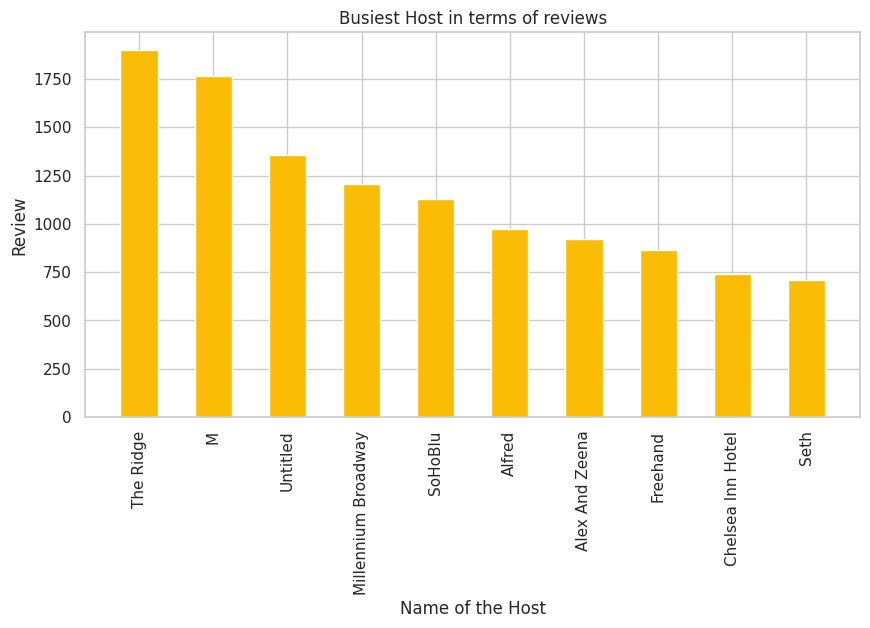

In [212]:
name_hosts = busy_hosts['host_name']
review_got = busy_hosts['number_of_reviews']

fig = plt.figure(figsize =(10,5))

plt.bar(name_hosts,review_got, color ='#fbbc05', width =0.5)
plt.xlabel('Name of the Host')
plt.ylabel('Review')
plt.title("Busiest Host in terms of reviews")
plt.xticks(rotation=90)
plt.show()

In [220]:
Highest_price= cleaned_df.groupby(['host_id','host_name','room_type','neighbourhood'])['price'].max().reset_index()
Highest_price= Highest_price.sort_values(by = 'price', ascending =False).head(10)
Highest_price

host_id          host_name        room_type     neighbourhood  price
11225   34906299             Teresa  Entire home/apt   Upper East Side   99.0
15219   79744902             Tamara  Entire home/apt          Bushwick   99.0
16455  107434423         Blueground  Entire home/apt   Upper East Side   99.0
10048   26556695  Justin And Alyssa     Private room           Midtown   99.0
25229  496932087       Reservations  Entire home/apt  Theater District   99.0
25237  496932087       Reservations     Private room           Midtown   99.0
25238  496932087       Reservations     Private room  Roosevelt Island   99.0
25242  496932087       Reservations     Private room   Upper West Side   99.0
11224   34906299             Teresa  Entire home/apt   Lower East Side   99.0
4668     6547579               Josh  Entire home/apt      East Village   99.0

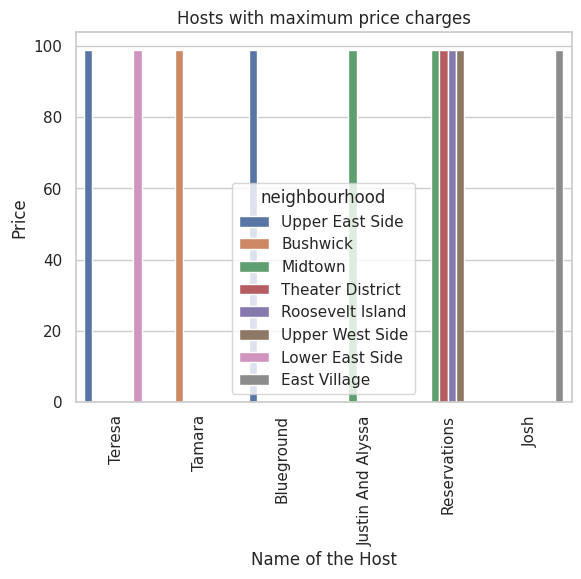

In [221]:
sns.barplot(data=Highest_price,x='host_name',y='price',hue='neighbourhood')
plt.xlabel('Name of the Host')
plt.ylabel('Price')
plt.title("Hosts with maximum price charges")
plt.xticks(rotation=90)
plt.show()

In [215]:
traffic_areas = cleaned_df.groupby(['neighbourhood','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by ='minimum_nights',ascending = False).head(10)
traffic_areas

neighbourhood        room_type  minimum_nights
31   Bedford-Stuyvesant     Private room            1582
509     Upper East Side  Entire home/apt            1289
544        Williamsburg  Entire home/apt            1215
30   Bedford-Stuyvesant  Entire home/apt            1162
329             Midtown  Entire home/apt            1146
66             Bushwick     Private room            1097
245      Hell's Kitchen  Entire home/apt            1083
545        Williamsburg     Private room            1070
512     Upper West Side  Entire home/apt            1034
243              Harlem     Private room            1010

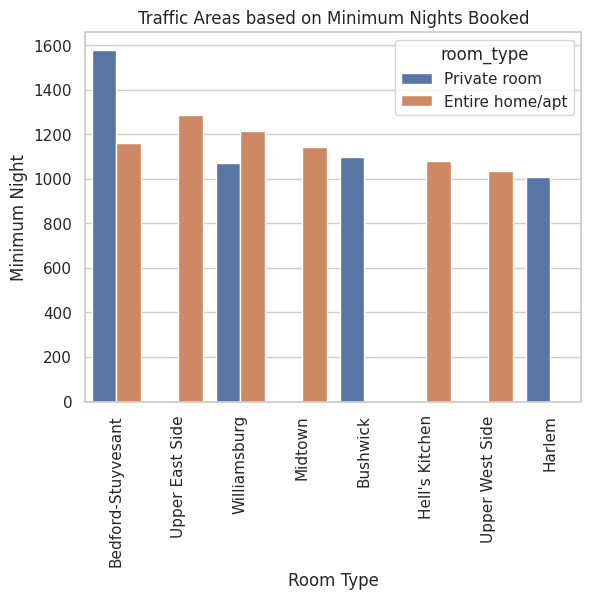

In [217]:
sns.barplot(data=traffic_areas,x='neighbourhood',y='minimum_nights',hue='room_type')
plt.xlabel("Room Type")
plt.ylabel("Minimum Night")
plt.title("Traffic Areas based on Minimum Nights Booked")
plt.xticks(rotation=90)
plt.show()

In [222]:
cleaned_df.corr(numeric_only=True,method = "kendall")

id   host_id  latitude  longitude     price  minimum_nights  number_of_reviews  reviews_per_month  calculated_host_listings_count  availability_365  number_of_reviews_ltm
id                              1.000000  0.402733  0.016353   0.026423  0.032965       -0.138612          -0.246973          -0.046097                        0.294389          0.265021               0.090331
host_id                         0.402733  1.000000  0.041413   0.049909  0.014130       -0.182415          -0.079333           0.027854                        0.182149          0.190587               0.095636
latitude                        0.016353  0.041413  1.000000   0.023430  0.038571       -0.029342          -0.065747          -0.062583                        0.082695          0.011255              -0.053990
longitude                       0.026423  0.049909  0.023430   1.000000 -0.161150        0.056862           0.075504           0.088083                       -0.040361          0.046855               0.093803
price                           0.032965  0.014130  0.038571  -0.161150  1.000000       -0.122901           0.013994           0.039061                        0.023457          0.013455               0.037743
minimum_nights                 -0.138612 -0.182415 -0.029342   0.056862 -0.122901        1.000000          -0.137989          -0.215894                       -0.071527         -0.034886              -0.233565
number_of_reviews              -0.246973 -0.079333 -0.065747   0.075504  0.013994       -0.137989           1.000000           0.790044                       -0.154664          0.043351               0.578714
reviews_per_month              -0.046097  0.027854 -0.062583   0.088083  0.039061       -0.215894           0.790044           1.000000                       -0.093667          0.109438               0.712258
calculated_host_listings_count  0.294389  0.182149  0.082695  -0.040361  0.023457       -0.071527          -0.154664          -0.093667                        1.000000          0.263665              -0.006681
availability_365                0.265021  0.190587  0.011255   0.046855  0.013455       -0.034886           0.043351           0.109438                        0.263665          1.000000               0.226385
number_of_reviews_ltm           0.090331  0.095636 -0.053990   0.093803  0.037743       -0.233565           0.578714           0.712258                       -0.006681          0.226385               1.000000

<Axes: >

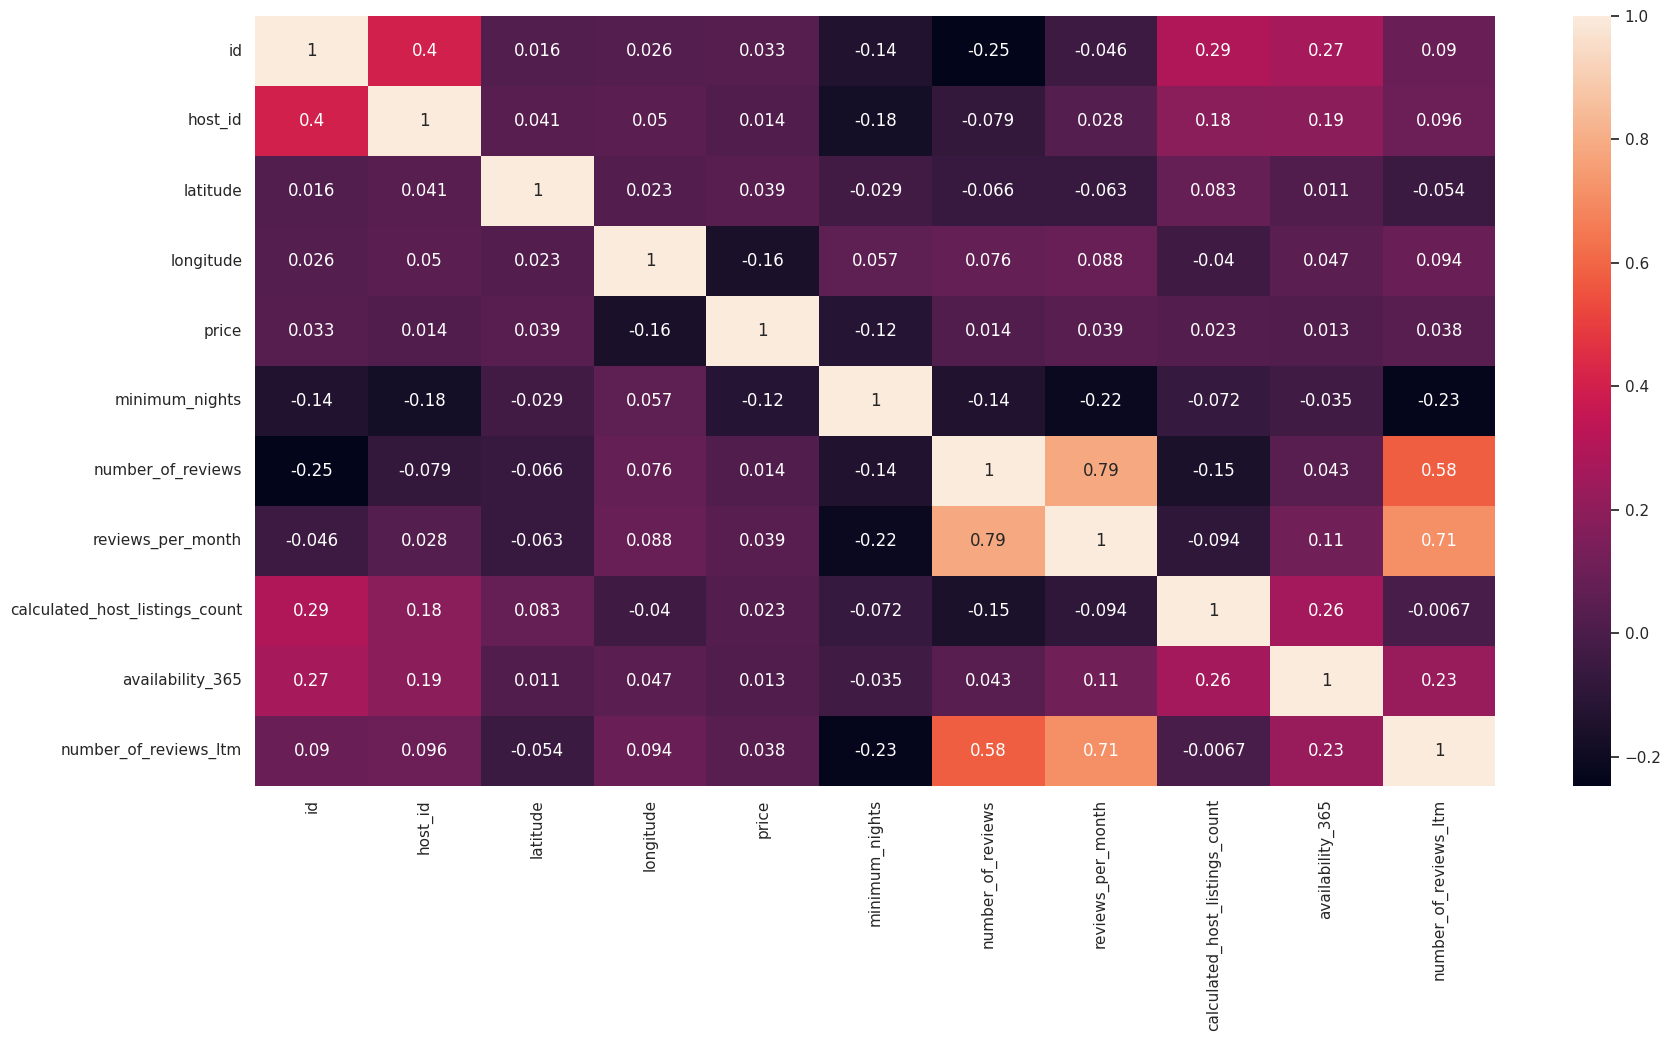

In [223]:
fig =plt.figure(figsize=(20,10))
sns.heatmap(cleaned_df.corr(numeric_only=True,method = "kendall"),annot = True)

<ipython-input-224-423c3b910fd8>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




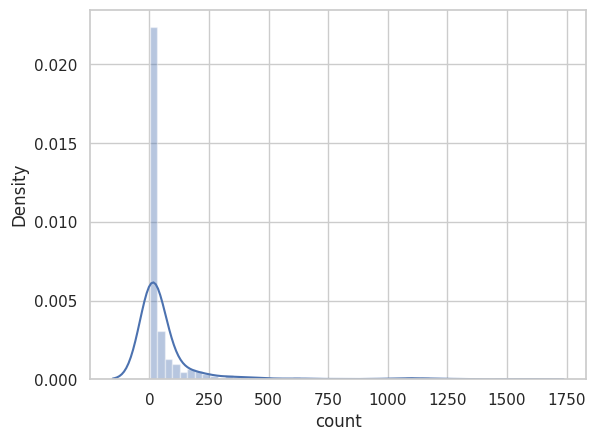

In [224]:
neighbourhood_room_type_count = cleaned_df.groupby(['neighbourhood'])[['neighbourhood','room_type']].value_counts().sort_values(ascending=False).reset_index()

res= neighbourhood_room_type_count.head(10)

sns.distplot(neighbourhood_room_type_count["count"])

plt.show()

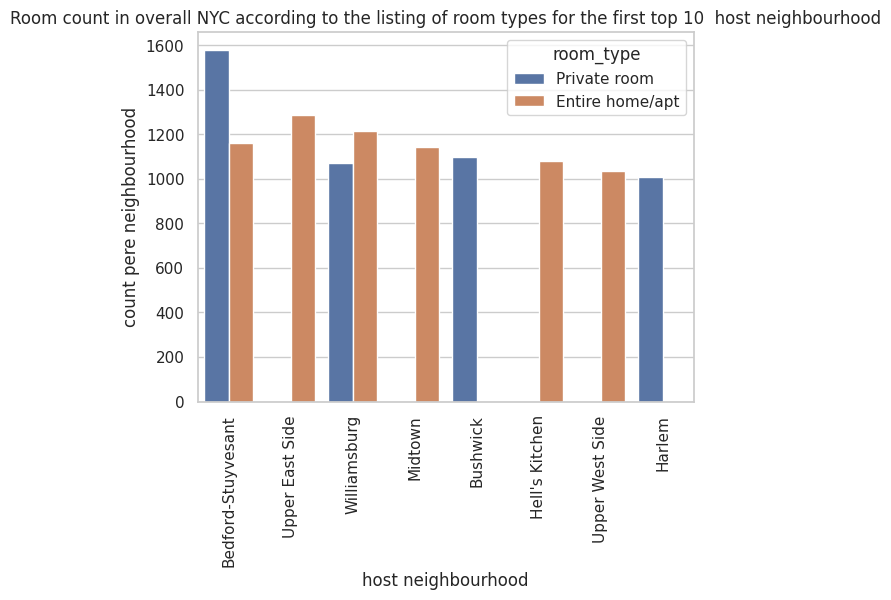

In [225]:
sns.barplot(data=res,x='neighbourhood',y='count',hue='room_type')
plt.xlabel("host neighbourhood")
plt.ylabel("count pere neighbourhood")
plt.title("Room count in overall NYC according to the listing of room types for the first top 10  host neighbourhood")
plt.xticks(rotation=90)
plt.show()

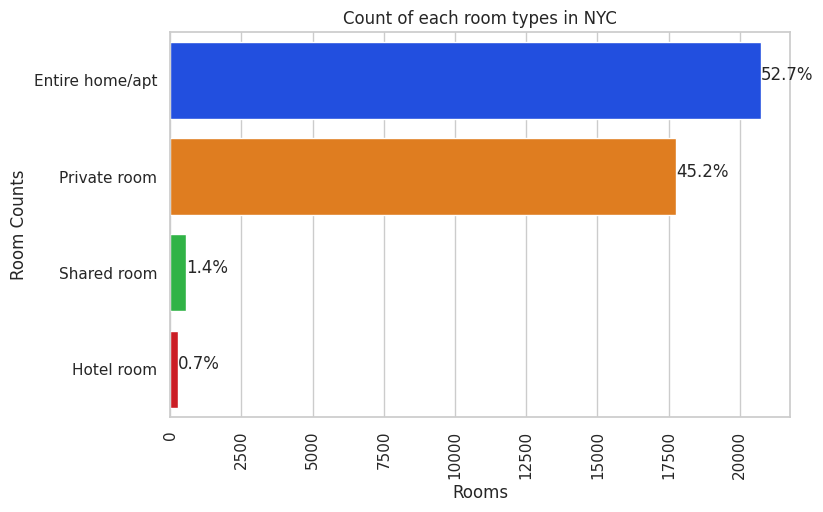

In [226]:
plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(y='room_type',data=cleaned_df,palette='bright')

total = len(cleaned_df['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Count of each room types in NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

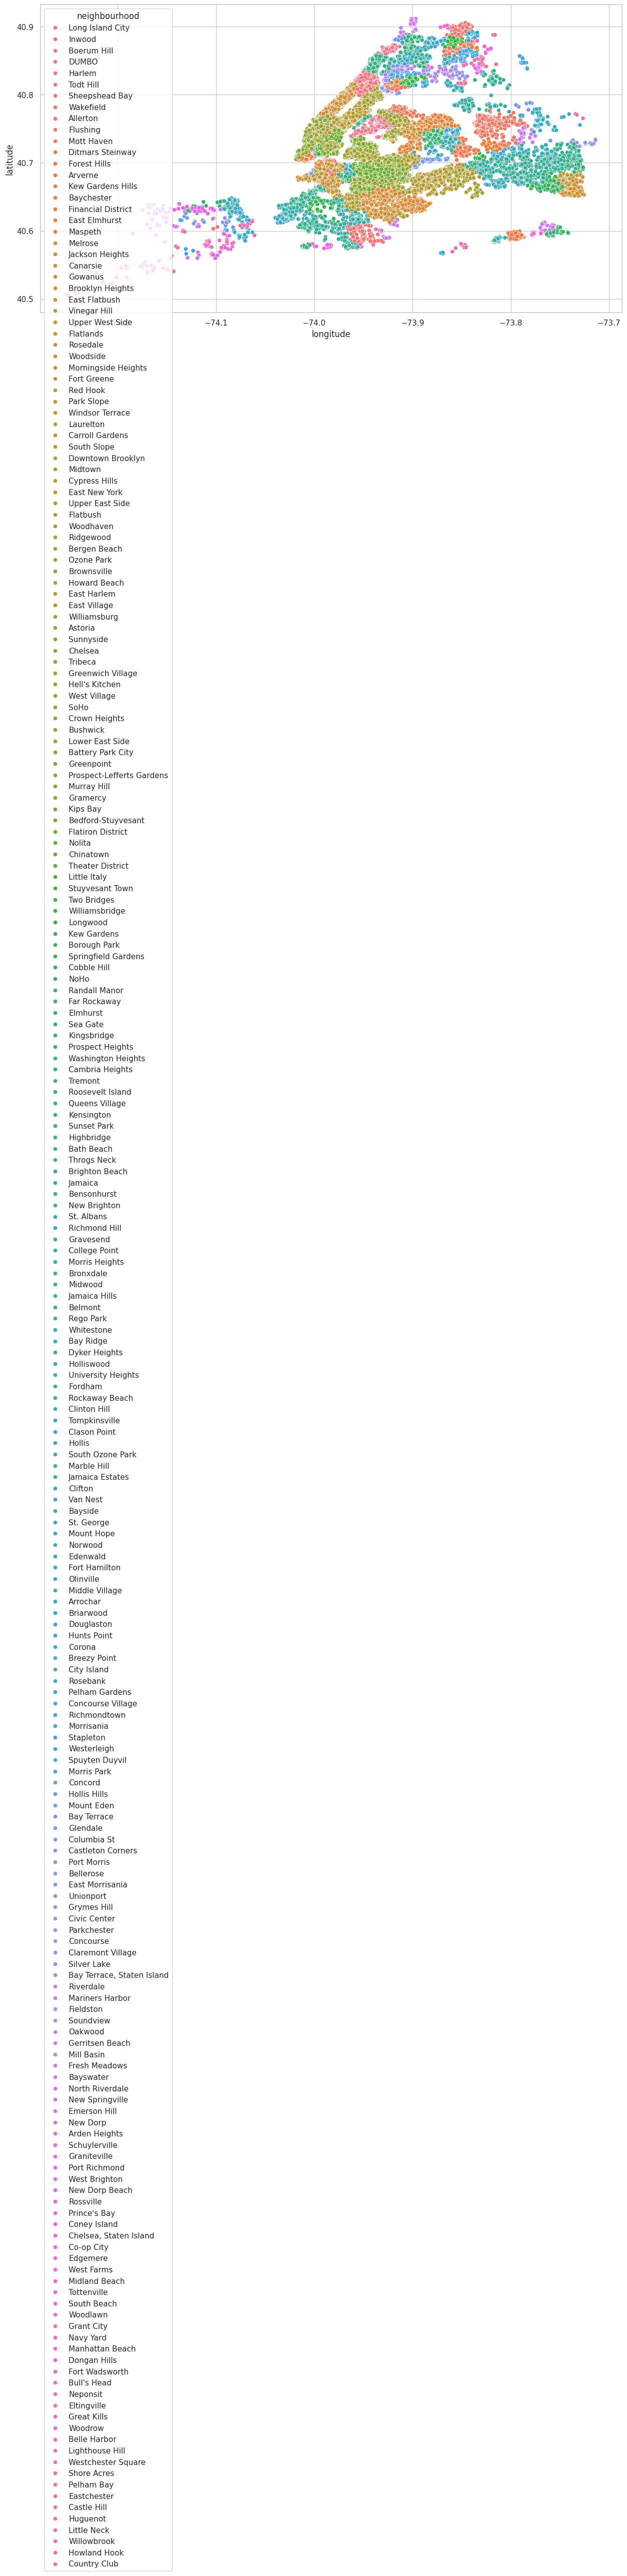

In [237]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=cleaned_df,x='longitude',y='latitude', hue='neighbourhood')
plt.show()

<Axes: xlabel='room_type'>

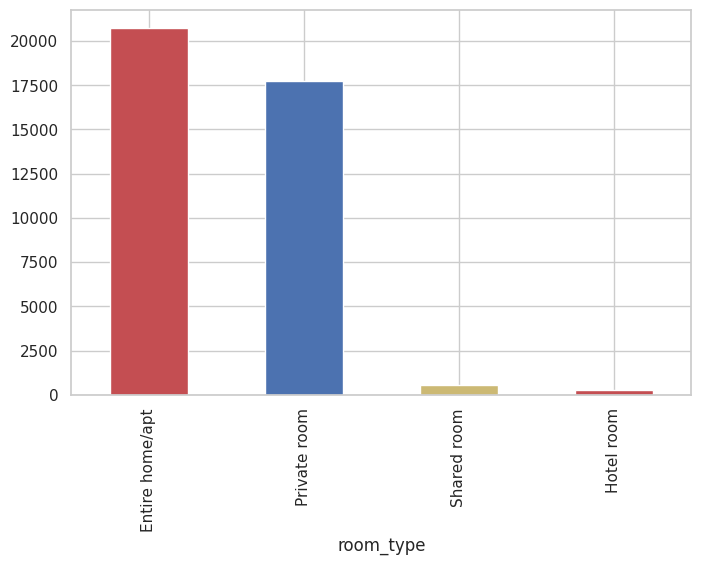

In [233]:
plt.figure(figsize=(8,5))
df['room_type'].value_counts().plot(kind='bar',color=['r','b','y'])

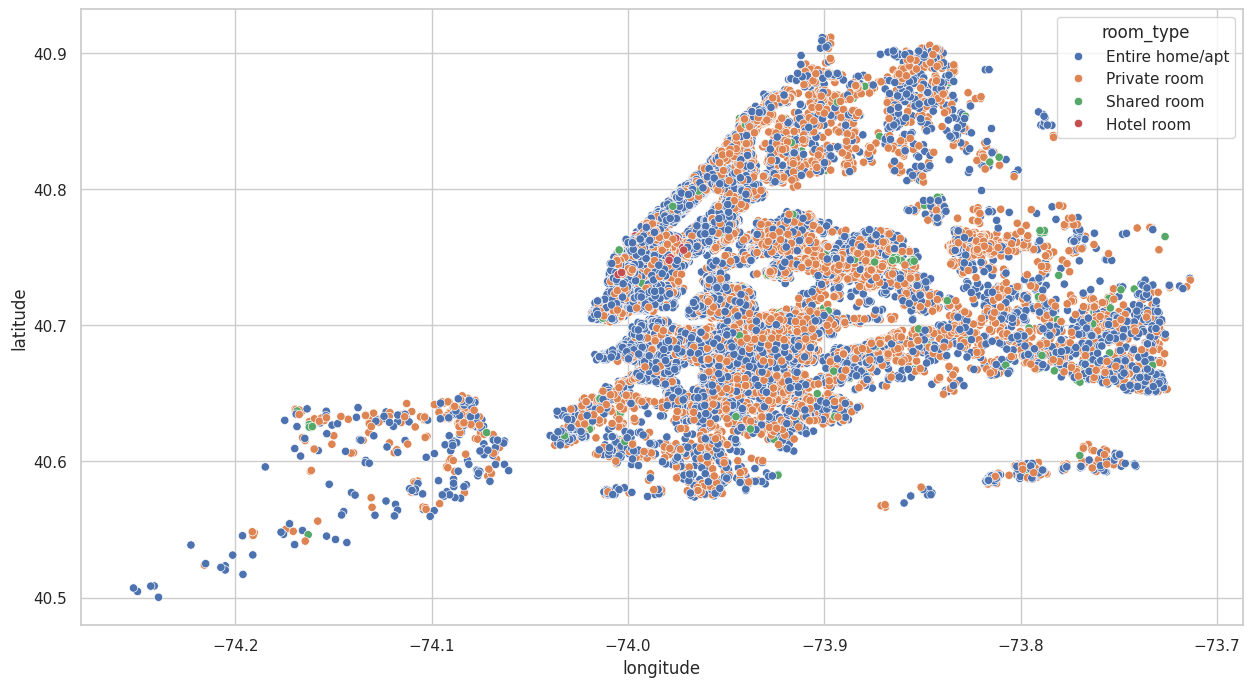

In [234]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=cleaned_df['longitude'],y=cleaned_df['latitude'], hue=cleaned_df['room_type'])
plt.show()